In [372]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
train=pd.read_csv("v.csv")
train.columns

Index(['Unnamed: 0', 'PID', 'AREA_CODE_y', 'BIG_IMPROVEMENT_YEAR_y', 'BLOCK_y',
       'CURRENT_IMPROVEMENT_VALUE_y', 'CURRENT_LAND_VALUE_y', 'DISTRICT_LOT_y',
       'FOLIO_y', 'FROM_CIVIC_NUMBER_y', 'HOUSE_PRICE_y', 'LAND_COORDINATE_y',
       'LEGAL_TYPE_y', 'LOCALITY_CODE_y', 'LOT_y', 'NARRATIVE_LEGAL_LINE1_y',
       'NARRATIVE_LEGAL_LINE2_y', 'NARRATIVE_LEGAL_LINE3_y',
       'NARRATIVE_LEGAL_LINE4_y', 'NARRATIVE_LEGAL_LINE5_y',
       'NEIGHBOURHOOD_CODE_y', 'PLAN_y', 'PREVIOUS_IMPROVEMENT_VALUE_y',
       'PREVIOUS_LAND_VALUE_y', 'PROPERTY_POSTAL_CODE_y', 'STREET_NAME_y',
       'TAX_ASSESSMENT_YEAR_y', 'TAX_LEVY_y', 'TO_CIVIC_NUMBER_y', 'YEAR_y',
       'YEAR_BUILT_y', 'ZONE_CATEGORY_y', 'ZONE_NAME_y'],
      dtype='object')

In [373]:
#dropping columns that we dont need
columns=['NARRATIVE_LEGAL_LINE1_y','LOT_y','ZONE_CATEGORY_y','ZONE_NAME_y','PROPERTY_POSTAL_CODE_y','PROPERTY_POSTAL_CODE_y','LOCALITY_CODE_y','DISTRICT_LOT_y','BLOCK_y','NARRATIVE_LEGAL_LINE4_y','STREET_NAME_y','PLAN_y','NARRATIVE_LEGAL_LINE3_y','NARRATIVE_LEGAL_LINE2_y','Unnamed: 0','NARRATIVE_LEGAL_LINE5_y','NEIGHBOURHOOD_CODE_y','TO_CIVIC_NUMBER_y','PID','AREA_CODE_y','FOLIO_y','TAX_ASSESSMENT_YEAR_y','FROM_CIVIC_NUMBER_y','CURRENT_IMPROVEMENT_VALUE_y','CURRENT_LAND_VALUE_y']
train=train.drop(columns,axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237851 entries, 0 to 237850
Data columns (total 9 columns):
BIG_IMPROVEMENT_YEAR_y          235996 non-null float64
HOUSE_PRICE_y                   237851 non-null float64
LAND_COORDINATE_y               237851 non-null float64
LEGAL_TYPE_y                    237851 non-null object
PREVIOUS_IMPROVEMENT_VALUE_y    103232 non-null float64
PREVIOUS_LAND_VALUE_y           103232 non-null float64
TAX_LEVY_y                      237851 non-null float64
YEAR_y                          237851 non-null int64
YEAR_BUILT_y                    235996 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 16.3+ MB


In [374]:
nan=(train.isnull().sum(axis=0))/len(train)
nan*100

BIG_IMPROVEMENT_YEAR_y           0.779900
HOUSE_PRICE_y                    0.000000
LAND_COORDINATE_y                0.000000
LEGAL_TYPE_y                     0.000000
PREVIOUS_IMPROVEMENT_VALUE_y    56.598038
PREVIOUS_LAND_VALUE_y           56.598038
TAX_LEVY_y                       0.000000
YEAR_y                           0.000000
YEAR_BUILT_y                     0.779900
dtype: float64

In [375]:
print("Skewness: %f" % train['HOUSE_PRICE_y'].skew())

Skewness: 34.910676


/opt/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


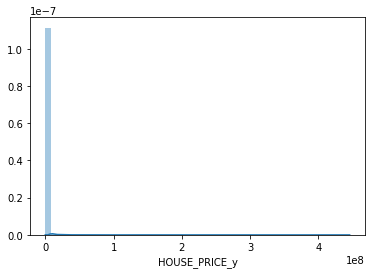

In [376]:
sns.distplot(train['HOUSE_PRICE_y'])

In [377]:
#target variable is skewed we do a log transformation to fix that
train.HOUSE_PRICE_y=np.log(train.HOUSE_PRICE_y)
print("Skewness: %f" % train['HOUSE_PRICE_y'].skew())

Skewness: -2.308000


/opt/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


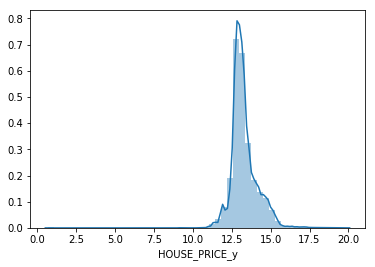

In [378]:
sns.distplot(train['HOUSE_PRICE_y'])

In [379]:
train_strata=train[train['LEGAL_TYPE_y']=='STRATA']
train_strata=train_strata.drop('LEGAL_TYPE_y',axis=1)
train_land= train[train['LEGAL_TYPE_y']=='STRATA']
train_land=train_land.drop('LEGAL_TYPE_y',axis=1)

/opt/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


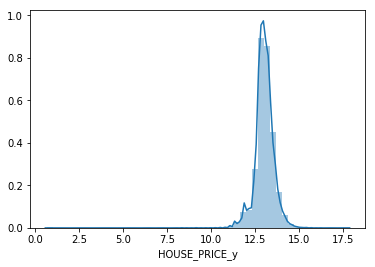

In [380]:
sns.distplot(train_land['HOUSE_PRICE_y'])

In [381]:
''''Column_Name_avg = train_strata['PREVIOUS_LAND_VALUE_y'].mean()
Column_Name_std = train_strata['PREVIOUS_LAND_VALUE_y'].std()
Column_Name_null_count = train_strata['PREVIOUS_LAND_VALUE_y'].isnull().sum()
Column_Name_null_random_list = np.random.randint(Column_Name_avg - Column_Name_std, Column_Name_avg + Column_Name_std, size=Column_Name_null_count)
train_strata['PREVIOUS_LAND_VALUE_y'][np.isnan(train_strata['PREVIOUS_LAND_VALUE_y'])] = Column_Name_null_random_list
train_strata['PREVIOUS_LAND_VALUE_y'] = train_strata['PREVIOUS_LAND_VALUE_y'].astype(int)'''

"'Column_Name_avg = train_strata['PREVIOUS_LAND_VALUE_y'].mean()\nColumn_Name_std = train_strata['PREVIOUS_LAND_VALUE_y'].std()\nColumn_Name_null_count = train_strata['PREVIOUS_LAND_VALUE_y'].isnull().sum()\nColumn_Name_null_random_list = np.random.randint(Column_Name_avg - Column_Name_std, Column_Name_avg + Column_Name_std, size=Column_Name_null_count)\ntrain_strata['PREVIOUS_LAND_VALUE_y'][np.isnan(train_strata['PREVIOUS_LAND_VALUE_y'])] = Column_Name_null_random_list\ntrain_strata['PREVIOUS_LAND_VALUE_y'] = train_strata['PREVIOUS_LAND_VALUE_y'].astype(int)"

In [382]:
train_land['BIG_IMPROVEMENT_YEAR_y'] = train_land['BIG_IMPROVEMENT_YEAR_y'].interpolate(method="linear")

In [383]:
train_land['YEAR_BUILT_y'] = train_land['YEAR_BUILT_y'].interpolate(method="linear")

In [384]:
train_land['PREVIOUS_IMPROVEMENT_VALUE_y'] = train_land['PREVIOUS_IMPROVEMENT_VALUE_y'].interpolate(method="linear")#.fillna(train_strata.PREVIOUS_IMPROVEMENT_VALUE_y.median)

In [385]:
train_land['PREVIOUS_LAND_VALUE_y'] = train_land['PREVIOUS_LAND_VALUE_y'].interpolate(method="linear")

In [386]:
train_land=train_land.dropna()
nan=(train_land.isnull().sum(axis=0))/len(train_land)
nan*100

BIG_IMPROVEMENT_YEAR_y          0.0
HOUSE_PRICE_y                   0.0
LAND_COORDINATE_y               0.0
PREVIOUS_IMPROVEMENT_VALUE_y    0.0
PREVIOUS_LAND_VALUE_y           0.0
TAX_LEVY_y                      0.0
YEAR_y                          0.0
YEAR_BUILT_y                    0.0
dtype: float64

In [387]:
train_land.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195097 entries, 19 to 237850
Data columns (total 8 columns):
BIG_IMPROVEMENT_YEAR_y          195097 non-null float64
HOUSE_PRICE_y                   195097 non-null float64
LAND_COORDINATE_y               195097 non-null float64
PREVIOUS_IMPROVEMENT_VALUE_y    195097 non-null float64
PREVIOUS_LAND_VALUE_y           195097 non-null float64
TAX_LEVY_y                      195097 non-null float64
YEAR_y                          195097 non-null int64
YEAR_BUILT_y                    195097 non-null float64
dtypes: float64(7), int64(1)
memory usage: 13.4 MB


In [388]:
train_land.BIG_IMPROVEMENT_YEAR_y=train_land.BIG_IMPROVEMENT_YEAR_y.astype(float)
train_land.PREVIOUS_IMPROVEMENT_VALUE_y=train_land.PREVIOUS_IMPROVEMENT_VALUE_y.astype(float)
train_land.PREVIOUS_LAND_VALUE_y=train_land.PREVIOUS_LAND_VALUE_y.astype(float)
train_land.YEAR_BUILT_y=train_land.YEAR_BUILT_y.astype(float)
#train_strata.drop("HOUSE_PRICE_y", axis=1).apply(lambda x: x.corr(train_strata.HOUSE_PRICE_y))

In [389]:
train_land.drop("HOUSE_PRICE_y", axis=1).apply(lambda x: x.corr(train_land.HOUSE_PRICE_y))

BIG_IMPROVEMENT_YEAR_y          0.074875
LAND_COORDINATE_y              -0.097741
PREVIOUS_IMPROVEMENT_VALUE_y    0.288557
PREVIOUS_LAND_VALUE_y           0.381397
TAX_LEVY_y                      0.206134
YEAR_y                          0.310189
YEAR_BUILT_y                    0.062192
dtype: float64

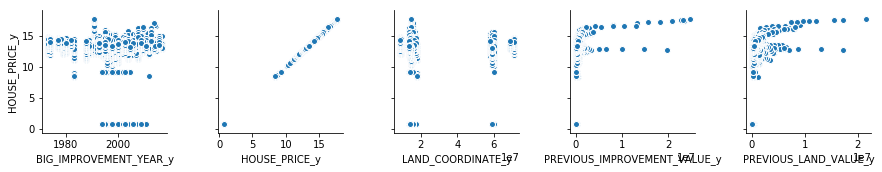

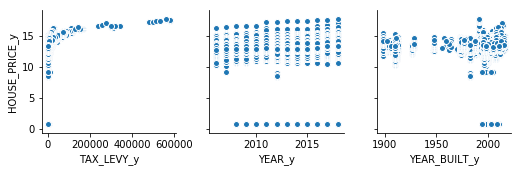

In [390]:
for i in range(0, len(train_land.columns), 5):
    sns.pairplot(data=train_land,
                x_vars=train_land.columns[i:i+5],
                y_vars=['HOUSE_PRICE_y'])

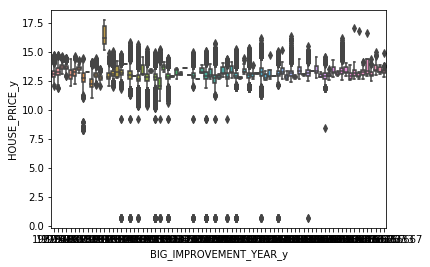

In [391]:
sns.boxplot(x=train_land['BIG_IMPROVEMENT_YEAR_y'], y=train['HOUSE_PRICE_y'])

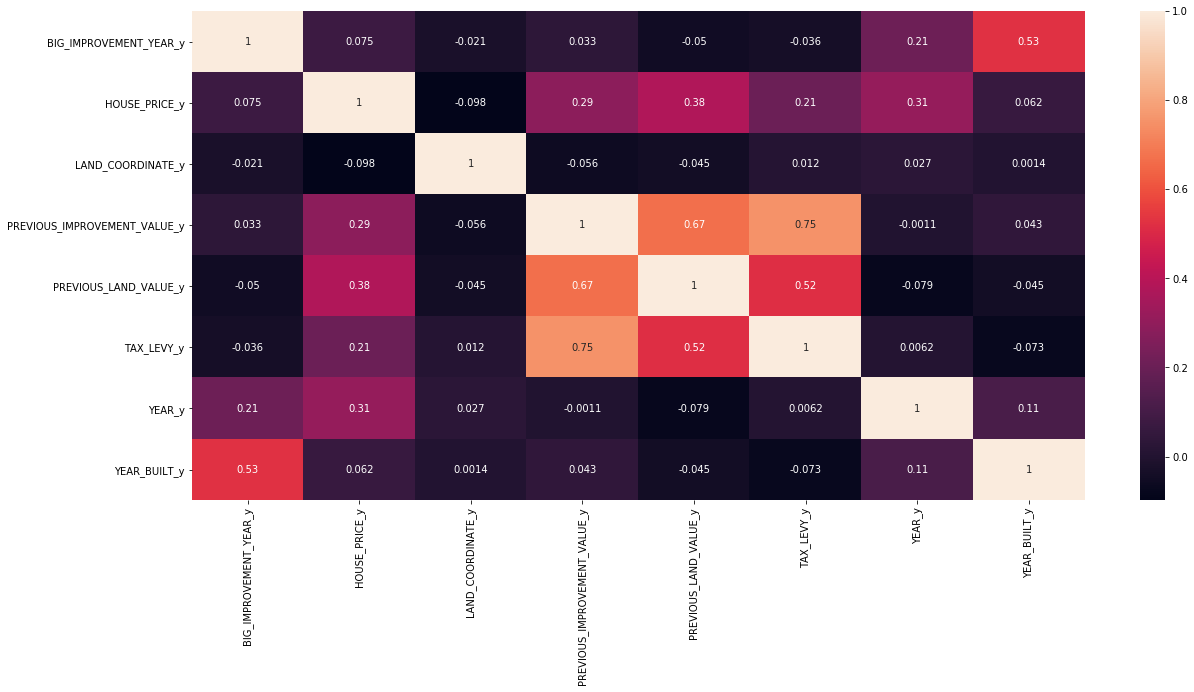

In [392]:
corr = train_land.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

In [393]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error


In [394]:
X=train_land.drop('HOUSE_PRICE_y',axis=1)
x=X
y=train_land['HOUSE_PRICE_y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=12)



In [395]:
#Parameter tuning, grid search

In [396]:
from sklearn.model_selection import GridSearchCV
grid_param = {
    'n_estimators':[100,300],
    'learning_rate':[0.05,0.1,0.2],
    'loss':['ls','huber'],
    'max_features':["auto","sqrt","log2"],
    'max_depth':[2,3]
}

gbr = GradientBoostingRegressor()

grid_search = GridSearchCV(estimator= gbr,  
                     param_grid=grid_param,
                     scoring='neg_mean_squared_error',
                     cv=5,
                     n_jobs=-1)

grid_search.fit(x_train,y_train)

best_parameters = grid_search.best_params_ 

print("Gradient Boost Best Parameters:",best_parameters)

Gradient Boost Best Parameters: {'learning_rate': 0.2, 'loss': 'ls', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 300}


In [397]:
gbr_model = GradientBoostingRegressor(learning_rate=0.2, loss='ls', max_depth=3, max_features='auto',n_estimators=300 , random_state=123)

In [398]:
gbr_model.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=3,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=300,
             presort='auto', random_state=123, subsample=1.0, verbose=0,
             warm_start=False)

In [399]:
from math import sqrt
from sklearn.metrics import r2_score
y_pred = gbr_model.predict(x_test)

rmse = sqrt(mean_squared_error(y_test, y_pred)) 
r2 = r2_score(y_test, y_pred)

print("Gradient Boost Regression Scores- rmse:",rmse," r2:",r2)

Gradient Boost Regression Scores- rmse: 0.16229831259293828  r2: 0.9451433651599583


In [340]:
grid_param = {
    'n_estimators':[10,100,500],
    'max_depth':[2],
    'min_samples_split':[6],
    'min_samples_leaf':[2],
    'max_features':["auto","sqrt","log2"]
}

rfr = RandomForestRegressor()

grid_search = GridSearchCV(estimator= rfr,  
                     param_grid=grid_param,
                     scoring='neg_mean_squared_error',
                     cv=5,
                     n_jobs=-1)

grid_search.fit(x_train,y_train)

best_parameters = grid_search.best_params_ 

print("Random Forest Best Parameters:",best_parameters)

Random Forest Best Parameters: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100}


In [400]:
rfr_model = RandomForestRegressor(max_depth=2, max_features='auto', min_samples_leaf=2, min_samples_split=6,n_estimators=100)

In [401]:
rfr_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [402]:
from math import sqrt
from sklearn.metrics import r2_score
y_pred = rfr_model.predict(x_test)

rmse = sqrt(mean_squared_error(y_test, y_pred)) 
r2 = r2_score(y_test, y_pred)

print("Random Forest Regression Scores- rmse:",rmse," r2:",r2)

Gradient Boost Regression Scores- rmse: 0.5202873388410826  r2: 0.43624855454103684
